In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [60]:
# Get billboard data
df = pd.read_csv("../unsynced-data/spotify.csv", index_col=0)
df_label = df["current_week"]
df = df.drop(["title", "performer", "current_week"], axis=1)
df = df.dropna()

In [62]:
# Standardize and run PCA
scaler = StandardScaler()
pca = PCA(n_components=3)
scaled_data = scaler.fit_transform(df)
pca_out = pca.fit_transform(scaled_data)
pca_out = pca_out[:20000, :]

In [63]:
# this code block taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
    fig = plt.figure()
    ax1 = fig.add_subplot(projection="3d")
    ax2 = fig.add_subplot(projection="3d")
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_out) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(pca_out)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_out, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_out, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        # ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        pca_out[:, 0], pca_out[:, 1], pca_out[:, 2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.40465310454414605
For n_clusters = 3 The average silhouette_score is : 0.3763173244520862
For n_clusters = 4 The average silhouette_score is : 0.4099600280337584
For n_clusters = 5 The average silhouette_score is : 0.36688246369722194
For n_clusters = 6 The average silhouette_score is : 0.3672804786191179


AttributeError: 'PolyCollection' object has no attribute 'do_3d_projection'

<Figure size 1800x700 with 2 Axes>

AttributeError: 'PolyCollection' object has no attribute 'do_3d_projection'

<Figure size 1800x700 with 2 Axes>

AttributeError: 'PolyCollection' object has no attribute 'do_3d_projection'

<Figure size 1800x700 with 2 Axes>

AttributeError: 'PolyCollection' object has no attribute 'do_3d_projection'

<Figure size 1800x700 with 2 Axes>

AttributeError: 'PolyCollection' object has no attribute 'do_3d_projection'

<Figure size 1800x700 with 2 Axes>

In [25]:
silhouette_avg = silhouette_score(pca_out, labels)
sample_silhouette_values = silhouette_samples(pca_out, labels)

In [6]:
def perform_pca(csv_file, axes_to_drop: list, n_components=None):
    # pd.set_option("display.max_columns", None)

    # Read in data
    orig = pd.read_csv(csv_file)
    df = orig.copy()
    df = df.drop(axes_to_drop, axis=1)

    df = df.dropna()

    # Perform scaling
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df)

    # perform pca
    pca = PCA()
    pca_out = pca.fit_transform(scaled_df)

    shape = pca.components_.shape[0]
    feature_names = list(df.columns)

    most_important = [np.abs(pca.components_[i]).argmax() for i in range(shape)]
    most_important_names = [feature_names[most_important[i]] for i in range(shape)]

    feat_dict = {f"PC{i}": most_important_names[i] for i in range(shape)}
    important_df = pd.DataFrame(feat_dict.items())

    data_dict = {
        "transformed_data": pca_out,
        "eigenvalues": pca.explained_variance_,
        "relative_eigenvalues": pca.explained_variance_ratio_,
        "important_features": important_df
    }

    return data_dict

In [7]:
def create_spotify_eigenvalue_chart(pca_data):
    bottom = 0
    i = 1
    for eigenvalue in pca_data["relative_eigenvalues"]:
        plt.bar("Relative Eigenvalues", eigenvalue, label=f"Eigenvalue {i}", bottom=bottom)
        i += 1
        bottom += eigenvalue

    plt.ylabel("Percent Variance Explained")
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.legend(loc="upper right")
    plt.title("Eigenvalues: Percentage of Variance/Information\nfor Spotify Feature Data")
    plt.show()

In [11]:
df = pd.read_csv("./data/hot-100-current.csv")
df = df.dropna()

pca_data = perform_pca("./data/hot-100-current.csv",
                       ["chart_week", "title", "performer", "current_week"])
pca_out = pca_data["transformed_data"]

(312540,)
[2 2 2 ... 1 1 0]
(312540,)
[4 4 4 ... 3 3 2]
(312540,)
[1 1 1 ... 4 4 0]
(312540,)
[2 2 2 ... 0 0 4]
(312540,)
[3 3 3 ... 1 1 2]
(312540,)
[4 4 4 ... 1 1 2]


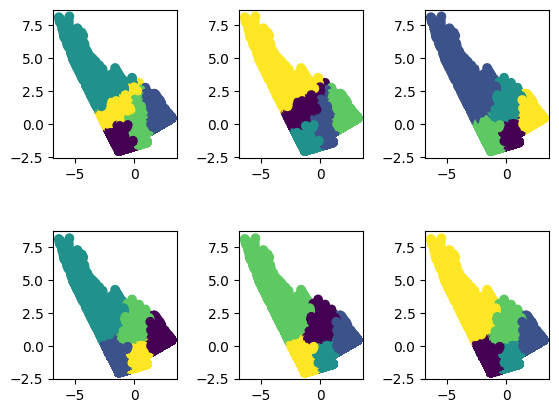

In [16]:
fig, axs = plt.subplots(2, 3)
fig.subplots_adjust(wspace=0.5, hspace=0.5)
for r in range(2):
    for c in range(3):
        kmean = KMeans(n_clusters=5)
        kmean.fit(pca_out[:, :2])
        print(kmean.labels_.shape)
        print(kmean.labels_)
        axs[r, c].scatter(x=pca_out[:, 0], y=pca_out[:, 1], c=kmean.labels_)

In [1]:
for r in range(2):
    for c in range(3):
        kmean = KMeans(n_clusters=5)
        kmean.fit(pca_out[:, :2])
        print(kmean.labels_.shape)
        print(kmean.labels_)
        axs[r, c] = sns.scatterplot(x=pca_out[:, 0], y=pca_out[:, 1], hue=kmean.labels_)

plt.show()

NameError: name 'KMeans' is not defined

In [43]:
df = pd.read_csv("./unsynced-data/lastfm.csv")

In [44]:
df.columns

Index(['lastfm_id', 'artist', 'title', 'lfm_similars', 'lfm_tags'], dtype='object')

In [ ]:
similars = df["lfm_similars"]
similars = similars.to_dict()
sim_vals = ast.literal_eval(list(similars.values()))


KeyboardInterrupt

